In [101]:
# -----------------------------
# 1. Import Required Libraries
# -----------------------------
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------------
# 2. Load and Preprocess Data
# -----------------------------
data = pd.read_csv(r"C:\Users\Saran Babu\Downloads\employee_salary_dataset_updated.csv")
data


,Experience,Education,JobRole,Location,Industry,Salary
0,6,Master,Project Manager,Seattle,Tech,110934
1,19,PhD,Marketing Executive,New York,Education,109926
2,14,Bachelor,Marketing Executive,New York,Tech,85363
3,10,Master,Data Analyst,Austin,Tech,85852
4,7,PhD,Data Analyst,Seattle,Healthcare,94380
...,...,...,...,...,...,...
495,11,PhD,HR,New York,Tech,92426
496,8,Bachelor,Data Analyst,San Francisco,Finance,84258
497,18,PhD,Software Engineer,New York,Education,141108
498,11,Bachelor,Data Analyst,Chicago,Education,77961


In [102]:
data=data.dropna()
data

,Experience,Education,JobRole,Location,Industry,Salary
0,6,Master,Project Manager,Seattle,Tech,110934
1,19,PhD,Marketing Executive,New York,Education,109926
2,14,Bachelor,Marketing Executive,New York,Tech,85363
3,10,Master,Data Analyst,Austin,Tech,85852
4,7,PhD,Data Analyst,Seattle,Healthcare,94380
...,...,...,...,...,...,...
495,11,PhD,HR,New York,Tech,92426
496,8,Bachelor,Data Analyst,San Francisco,Finance,84258
497,18,PhD,Software Engineer,New York,Education,141108
498,11,Bachelor,Data Analyst,Chicago,Education,77961


In [103]:
data = data.drop_duplicates()

In [104]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

target_column = data.columns[-1]

if target_column in categorical_cols:
    categorical_cols.remove(target_column)

if target_column in numerical_cols:
    numerical_cols.remove(target_column)


print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Education', 'JobRole', 'Location', 'Industry']
Numerical Columns: ['Experience']


In [105]:
column_values = {col: data[col].unique().tolist() for col in categorical_cols}
column_values
joblib.dump(column_values, 'column_values.pkl')


['column_values.pkl']

In [106]:
encoders = {}  # Dictionary to store encoders for each column

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le  # Store the encoder for this column

# Save the dictionary of encoders
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

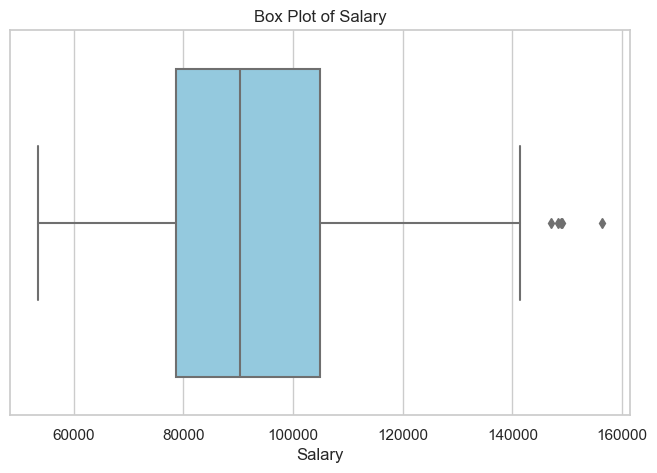

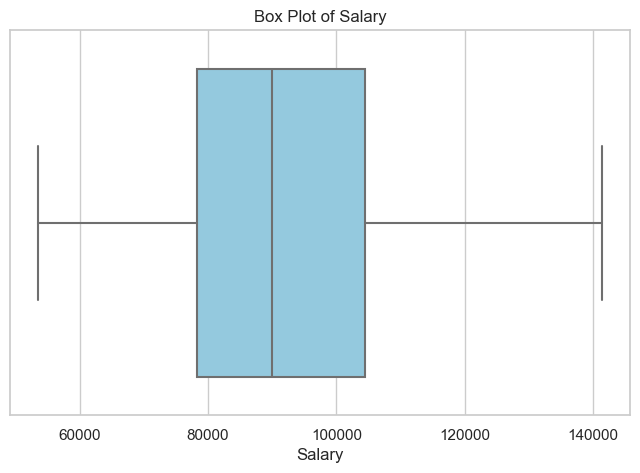

In [107]:
import seaborn as sns
#Set a style (optional)
sns.set(style="whitegrid")

# Plot box plot for Salary
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Salary'], color='skyblue')
plt.title("Box Plot of Salary")
plt.xlabel("Salary")
plt.show()


Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]


sns.set(style="whitegrid")

# Plot box plot for Salary
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Salary'], color='skyblue')
plt.title("Box Plot of Salary")
plt.xlabel("Salary")
plt.show()



In [108]:
x = data.drop('Salary', axis=1)
y = data['Salary'].values.reshape(-1, 1)  # reshape required for scaler

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

order_columns = list(x_train.columns)
joblib.dump(order_columns, 'order_columns.pkl')


# Scale input features
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

# Scale target (Salary)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print(scaler_y)
print(scaler_x)

joblib.dump(scaler_x, 'scaler_x.pkl')

joblib.dump(scaler_y, 'scaler_y.pkl')

StandardScaler()
StandardScaler()


['scaler_y.pkl']

In [109]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),  # 5 input features
    Dropout(0.2),                                     # Optional regularization
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer (no activation for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary
model.summary()

'''model = Sequential([
    Dense(128, activation='relu', input_shape=(len(order_columns),)),  # Larger first layer
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    
    Dense(1)  # No activation for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()'''




C:\Users\Saran Babu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

"model = Sequential([\n    Dense(128, activation='relu', input_shape=(len(order_columns),)),  # Larger first layer\n    BatchNormalization(),\n    Dropout(0.3),\n    \n    Dense(64, activation='relu'),\n    BatchNormalization(),\n    Dropout(0.3),\n    \n    Dense(32, activation='relu'),\n    Dropout(0.2),\n    \n    Dense(16, activation='relu'),\n    \n    Dense(1)  # No activation for regression\n])\n\nmodel.compile(optimizer='adam', loss='mse', metrics=['mae'])\nmodel.summary()"

In [110]:
history = model.fit(
    x_train_scaled, y_train_scaled,  # scaled inputs and targets
    validation_split=0.2,            # optional
    epochs=200,
    batch_size=16,
    verbose=1
)


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8111 - mae: 0.7082 - val_loss: 0.5156 - val_mae: 0.5847
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4972 - mae: 0.5614 - val_loss: 0.3327 - val_mae: 0.4730
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3742 - mae: 0.4812 - val_loss: 0.2995 - val_mae: 0.4520
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3892 - mae: 0.5092 - val_loss: 0.2883 - val_mae: 0.4456
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3849 - mae: 0.4910 - val_loss: 0.2772 - val_mae: 0.4347
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3191 - mae: 0.4609 - val_loss: 0.2669 - val_mae: 0.4265
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3085 - mae: 0.4498 - val_loss: 0.2561 - val_mae: 0.4249
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3254 - mae: 0.4726 - val_loss: 0.2499 - val_mae: 0.4129
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2

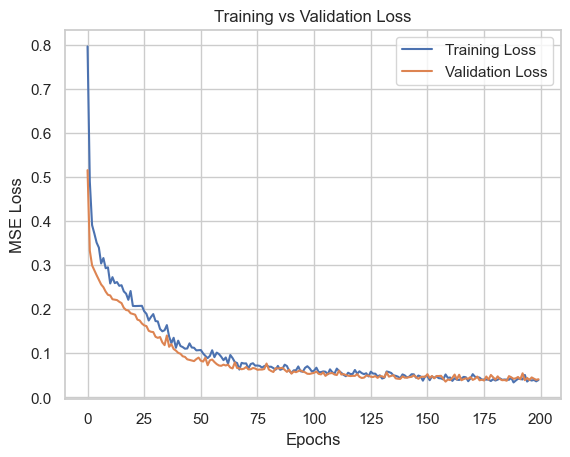

In [111]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [112]:
model.save('salary_prediction_model.h5')
joblib.dump(categorical_cols, 'categorical_cols.pkl')
joblib.dump(numerical_cols, 'numerical_cols.pkl')

['numerical_cols.pkl']

In [113]:
# Make predictions (these will be scaled)
y_pred_scaled = model.predict(x_test_scaled)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Inverse transform to original scale

y_test_original = scaler_y.inverse_transform(y_test_scaled)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)
# MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# MSE
mse = mean_squared_error(y_test_original, y_pred_original)

# RMSE
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test_original, y_pred_original)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")





MAE:  3702.59
MSE:  21429749.69
RMSE: 4629.23
R² Score: 0.9508


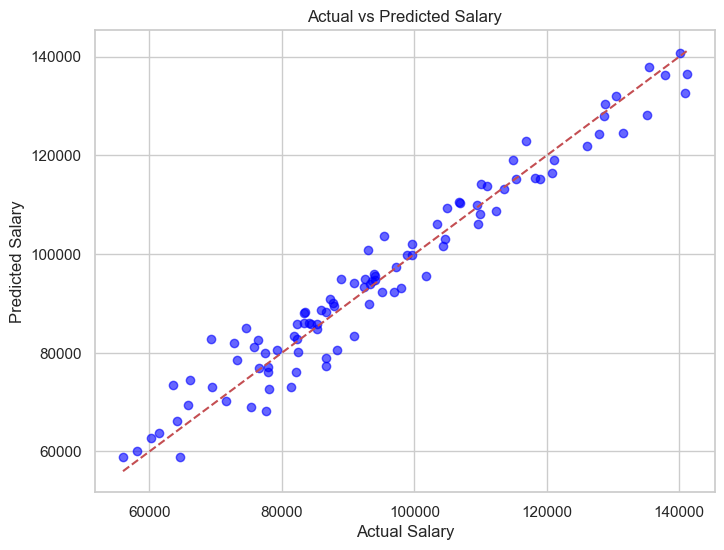

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()


In [116]:
input_data = {
    'Education': 'Master',
    'Industry': 'Tech',
    'JobRole': 'Project Manager',
    'Location': 'Seattle',
    'Experience': 6.0
}


In [117]:
ddf = pd.DataFrame([input_data])

In [118]:
for col in categorical_cols:
    encoder = encoders[col]
    ddf[col] = encoder.transform(ddf[col])

In [119]:
# Apply scaler only on the required order
ddf[order_columns] = scaler_x.transform(ddf[order_columns])

In [120]:
prediction_scaled = model.predict(ddf.to_numpy())[0][0]
prediction = scaler_y.inverse_transform([[prediction_scaled]])[0][0]

print(f"Predicted Salary: ₹{prediction:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Salary: ₹133600.41


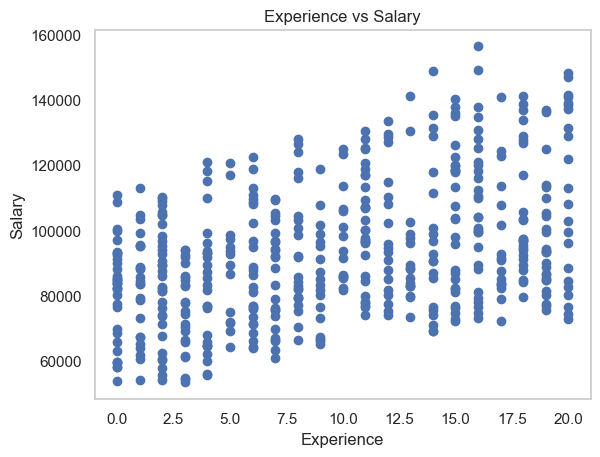

In [121]:
import matplotlib.pyplot as plt

train_df = pd.read_csv(r"C:\Users\Saran Babu\Downloads\employee_salary_dataset_updated.csv")
#train_df=pd.read_csv(r"C:/Users/Saran Babu/OneDrive/Desktop/Salary_Data.csv")

plt.scatter(train_df['Experience'], train_df['Salary'])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


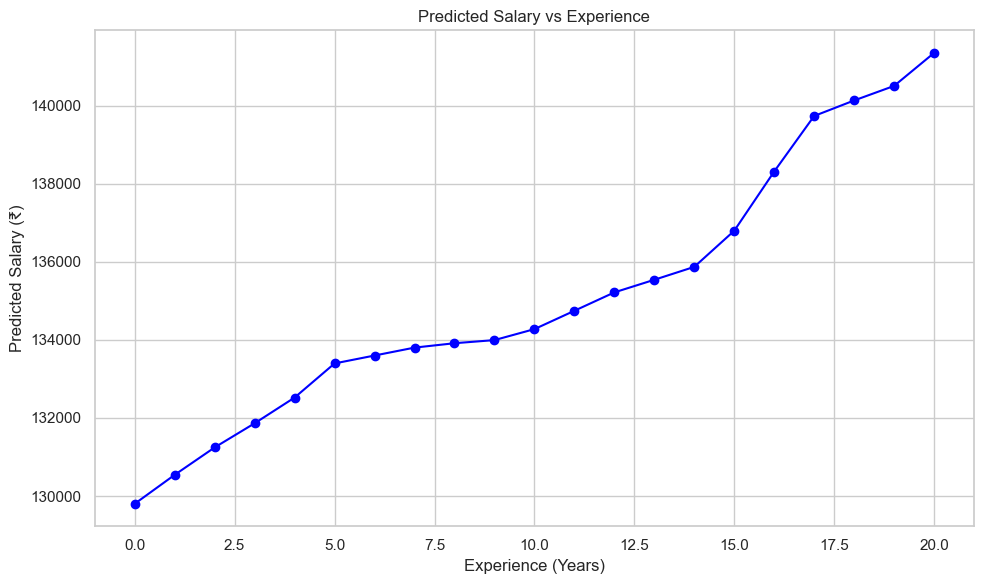

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Template input data
input_data_template = {
    'Education': 'Master',
    'Industry': 'Tech',
    'JobRole': 'Project Manager',
    'Location': 'Seattle'
}

# Store results
experience_values = []
predicted_salaries = []

# Predict for experience values from 0 to 20
for exp in range(0, 21):
    # Prepare input
    input_data = input_data_template.copy()
    input_data['Experience'] = exp
    dff = pd.DataFrame([input_data])

    # Encode categorical columns
    for col in categorical_cols:
        dff[col] = encoders[col].transform(dff[col])

    # Reorder and scale
    dff[order_columns] = scaler_x.transform(dff[order_columns])

    # Predict
    prediction_scaled = model.predict(dff.to_numpy())[0][0]
    prediction = scaler_y.inverse_transform([[prediction_scaled]])[0][0]

    experience_values.append(exp)
    predicted_salaries.append(prediction)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(experience_values, predicted_salaries, marker='o', color='blue')
plt.title("Predicted Salary vs Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Predicted Salary (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()
